# Homework 4

Submission: Please upload your completed **solution .ipynb file and printed PDF file** to [Brightspace](https://it.stonybrook.edu/services/brightspace) by **May 15, 11:59PM EST**.

## Exercise 1: Medical Image Registration with ANTs

In this exercise, you will learn how to use the Advanced Normalization Tools (ANTs) for medical image registration. You can read more about the manual [here](https://github.com/stnava/ANTsDoc/raw/master/ants2.pdf).

In [ ]:
import SimpleITK as sitk
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import patches

If you use local workstation, the ANTs has been downloaded on the server. Otherwise, you can download it [here](https://github.com/ANTsX/ANTs/releases/download/v2.5.1/ants-2.5.1-centos7-X64-gcc.zip).

Here we use 3D lung CT scans as example. Please download the fixed image, the moving image and associated segmentation mask [here](https://drive.google.com/drive/folders/1yCCzXi8fNZ_4kwf7i6q0hAPJO68VFIj5?usp=sharing).

**Task 1.1** Please complete the code below for performing image registration. You will need use the following parameters:
- For registartion transform type, please use Affine transform with a gradient step size of 0.01.
- Use Mutual Information (MI) as metric, with a radius of 1 voxel, 32 histogram bins, a regular sampling strategy, and a sampling percentage of 0.5 (i.e., 50% of the voxels will be used for the metric computation).

The provided parameters specified the input/output path, and the following settings:
- The registration needs to be performed at multiple resolution level. Specifically, downsamples the images by a factor of 4 at the coarsest level, 2 at the next level, and 1 (no downsampling) at the finest level.
- For convergence criteria, use 500 iterations at the coarsest level, 250 iterations at the next level, and 100 iterations at the finest level.
- Apply a smoothing factor of 2 voxels at the coarsest level, 1 voxel at the next level, and no smoothing at the finest level.


*Hint:* Use ``!antsRegistration`` to learn about the parameters

In [ ]:
fixed_img_path = '/Users/mounikag/Downloads/hw4/hw4_fixed_img_14303S.nii'
moving_img_path = '/Users/mounikag/Downloads/hw4/hw4_moving_img_10009Y.nii'
# Output file
warped_img_name = 'hw4_warped_img_10009Y'
# ANTs path, change if needed
ants_path = "/Users/mounikag/Downloads/ants-2.5.1-arm/bin/"

# complete the command line below
cmd = ants_path+"antsRegistration -d 3 \
                        -o [./"+warped_img_name+"_,./"+warped_img_name+".nii.gz] \
                        -r ["+fixed_img_path+", "+moving_img_path+",1] \
                        -t Affine[0.01] \
                        -m MI[" + fixed_img_path + ", " + moving_img_path + ", 1, 32, Regular, 0.5] \
                        -c [500x250x100] \
                        -s 2x1x0 \
                        -f 4x2x1"

os.system(cmd)

0

With 8 CPU cores, it would be finished within 10 minutes.

**Task 1.2 (warm-up):** Use ITK-SNAP to overlay warped moving image on top of the fixed image, using a transparency of 50%. Attach a screenshot below.

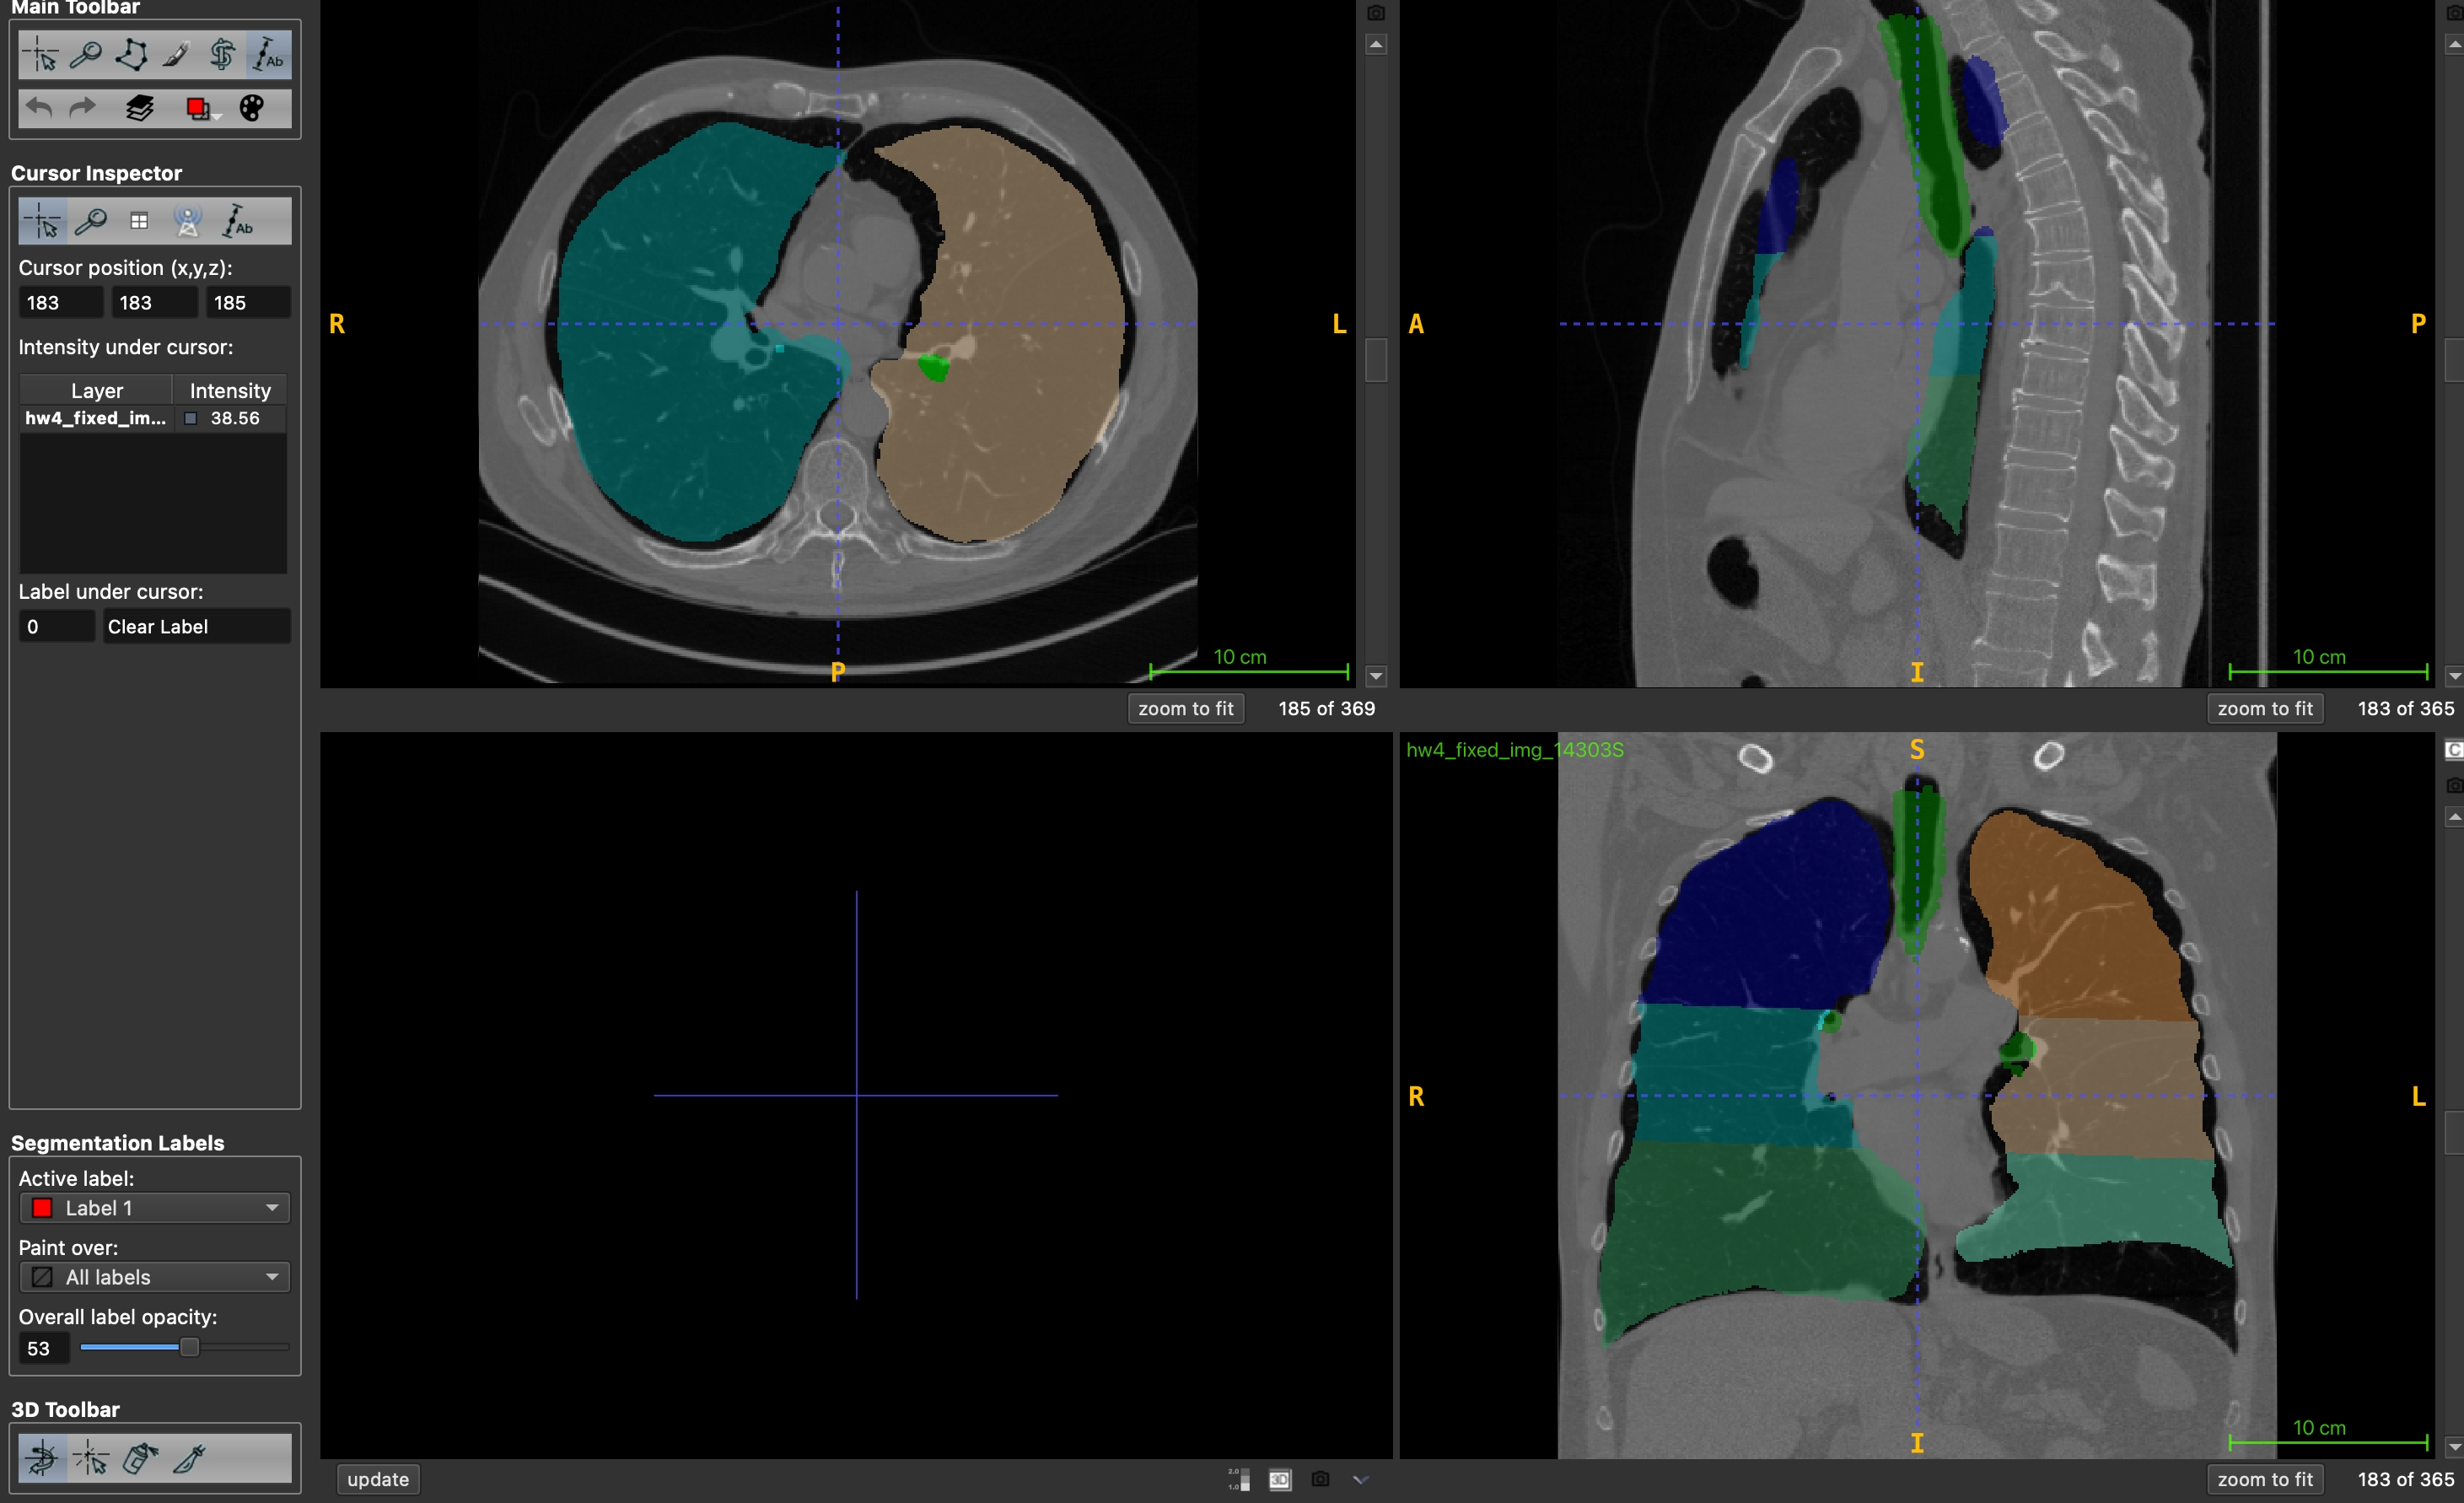

In [ ]:
# utility function for plotting
def plot_points_on_grid(x,y,z,array,cmap='gray'):
    '''x,y,z are indices, not pixel coordinates'''

    fig,[ax1, ax2, ax3]=plt.subplots(1,3,figsize=(12,12))

    # along x axis
    ax1.imshow(array[x,:,:],origin="lower",cmap=cmap)
    rect=patches.Rectangle((z-15,y-15),30,30,facecolor='none',edgecolor='r')
    ax1.plot(z,y,'o')
    ax1.add_patch(rect)

    # along y axis
    ax2.imshow(array[:,y,:],origin="lower",cmap=cmap)
    rect=patches.Rectangle((z-15,x-15),30,30,facecolor='none',edgecolor='r')
    ax2.plot(z,x,'o')
    ax2.add_patch(rect)

    # along z axis
    ax3.imshow(array[:,:,z],origin="lower",cmap=cmap)
    rect=patches.Rectangle((y-15,x-15),30,30,facecolor='none',edgecolor='r')
    ax3.plot(y,x,'o')
    ax3.add_patch(rect)

    plt.show()

def pixel_to_point(pixel):
    return pixel[2]-1, pixel[1]-1,pixel[0]-1

In [ ]:
fixed_img=sitk.ReadImage(fixed_img_path)
moving_img=sitk.ReadImage(moving_img_path)
warped_img=sitk.ReadImage(warped_img_name+".nii.gz")

## Transform a point from fixed image to moving image

In this section, you will learn how to transform a point from fixed image to moving image using the fitted transform.

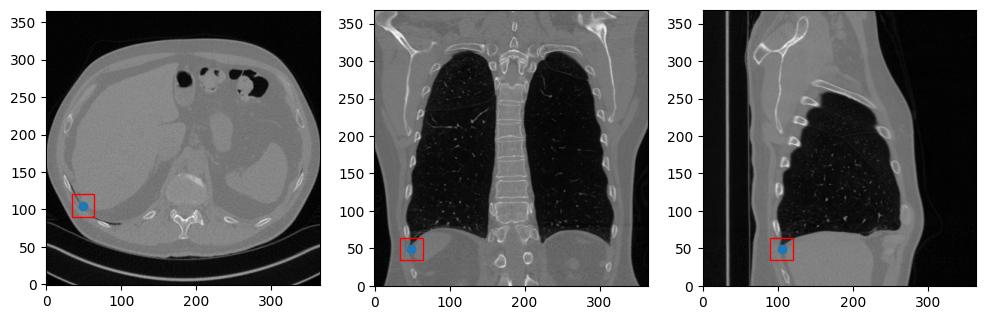

In [ ]:
target_pixel_on_fixed=(50,106,50)

x,y,z=pixel_to_point(target_pixel_on_fixed)
plot_points_on_grid(x,y,z,sitk.GetArrayFromImage(fixed_img))

**Task 1.3.1:** Complete the code below to transform a pixel on the fixed image to the corresponding location on the moving image. It typically involves three steps:
- Convert a pixel **index** in the fixed image to its corresponding physical point **coordinate** in the fixed image space, because the registration is performed in the space of physical coordinate.
- Apply the previously read affine transformation to the physical coordinate to find the corresponding physical coordinate in the moving image space.
- Convert the physical coordinate in the moving image space back to its corresponding pixel index in the moving image.

In [ ]:
affine_transform=sitk.ReadTransform(warped_img_name+'_0GenericAffine.mat')

# complete the code below
physical_cor_on_fixed= fixed_img.TransformIndexToPhysicalPoint(target_pixel_on_fixed)
print('physical_cor_on_fixed', physical_cor_on_fixed)
physical_cor_on_moving= affine_transform.TransformPoint(physical_cor_on_fixed)
print('physical_cor_on_moving',physical_cor_on_moving)
target_pixel_on_moving= moving_img.TransformPhysicalPointToIndex(physical_cor_on_moving)
print('target_pixel_on_moving',target_pixel_on_moving)

physical_cor_on_fixed (-134.1435546875, -96.03643798828125, -337.5)
physical_cor_on_moving (-122.80701417403294, 63.35939360578605, -295.89195189145744)
target_pixel_on_moving (47, 112, 24)


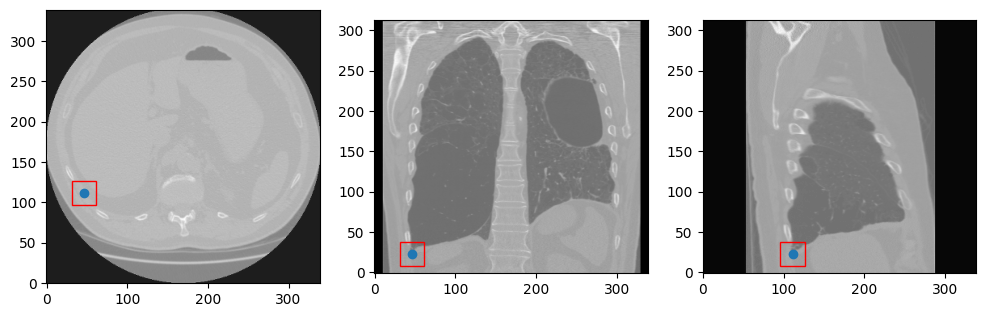

In [ ]:
x,y,z=pixel_to_point(target_pixel_on_moving)
plot_points_on_grid(x,y,z, sitk.GetArrayFromImage(moving_img))

## Transform a point from moving image to fixed image

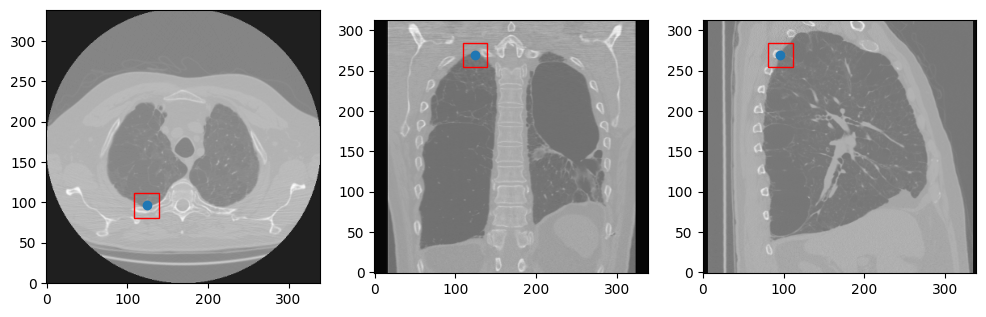

In [ ]:
target_pixel_on_moving=(125,97,270)

x,y,z=pixel_to_point(target_pixel_on_moving)
plot_points_on_grid(x,y,z, sitk.GetArrayFromImage(moving_img))

**Task 1.3.2:** Complete the code below to transform a pixel on the moving image to the corresponding location on the fixed image. It typically involves four steps:
- Get a inverse transform of the fitted transform (Because we are transform in the reverse direction)
- Convert a pixel **index** in the moving image to its corresponding physical point **coordinate** in the moving image space, because the registration is performed in the space of physical coordinate.
- Apply the reversed affine transformation to the physical coordinate to find the corresponding physical coordinate in the fixed image space.
- Convert the physical coordinate in the fixed image space back to its corresponding pixel index in the fixed image.

In [ ]:
# complete the code below
affine_transform_inv= affine_transform.GetInverse()

physical_cor_on_moving= moving_img.TransformIndexToPhysicalPoint(target_pixel_on_moving)
print('physical_cor_on_moving', physical_cor_on_moving)
physical_cor_on_fixed= affine_transform_inv.TransformPoint(physical_cor_on_moving)
print('physical_cor_on_fixed',physical_cor_on_fixed)
target_pixel_on_fixed= fixed_img.TransformPhysicalPointToIndex(physical_cor_on_fixed)
print('target_pixel_on_fixed',target_pixel_on_fixed)

physical_cor_on_moving (-44.69999694824219, 78.13569641113281, -49.875)
physical_cor_on_fixed (-50.82329311099713, -96.73789726002423, -72.15489403804892)
target_pixel_on_fixed (133, 107, 315)


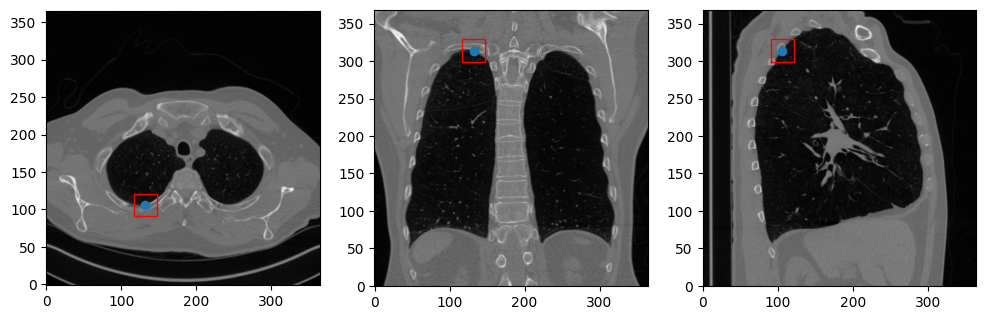

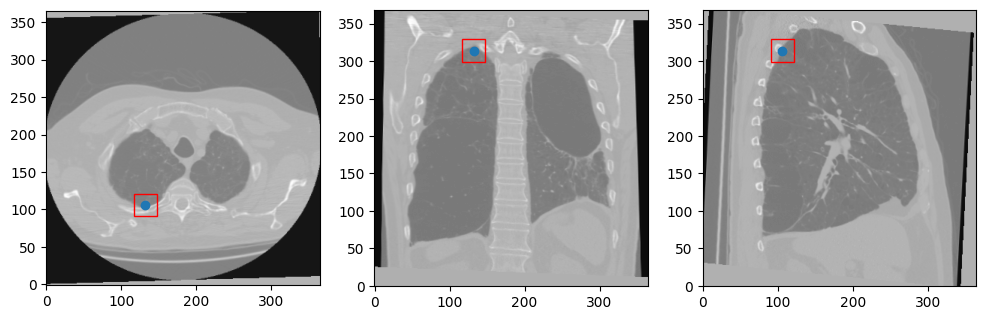

In [ ]:
x,y,z=pixel_to_point(target_pixel_on_fixed)

plot_points_on_grid(x,y,z, sitk.GetArrayFromImage(fixed_img))
plot_points_on_grid(x,y,z, sitk.GetArrayFromImage(warped_img))

## Apply transform to segmentation mask

**Task 1.4:** Complete the ``resample`` function below and use the function to apply the fitted affine transform to transform the moving mask to the fixed domain. Please note:
- You will need to use nearest neighbor interpolater, because the segmentation mask is categorical.
- The default value needs to be set to 0.
- Use the fixed image as the reference image

*Hint:* Read the arguments of ``sitk.Resample`` function.

In [ ]:
def resample(image, reference_image, transform):
    # return sitk.Resample(
    #     image1=image,
    #     referenceImage=reference_image,
    #     transform=transform,
    #     interpolator=sitk.sitkNearestNeighbor,  # Use nearest neighbor for masks (categorical data)
    #     defaultPixelValue=0,                    # Default background value
    #     outputPixelType=image.GetPixelID()      # Keep the same pixel type as the mask
    # )
    # return sitk.Resample()

    resampler = sitk.ResampleImageFilter()

    # Set the interpolator to nearest neighbor for categorical masks
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)

    # Set parameters from the reference image
    resampler.SetReferenceImage(reference_image)

    # The output will have the same size, spacing, direction, and origin as the reference image

    # Set the transform
    resampler.SetTransform(transform)

    # Set default pixel value to 0 (for regions where the transform maps outside the input image)
    resampler.SetDefaultPixelValue(0)

    # Execute the resampling
    return resampler.Execute(image)

moving_mask_path = '/Users/mounikag/Downloads/hw4/hw4_moving_mask_10009Y.nii.gz'
moving_mask=sitk.ReadImage(moving_mask_path)

warped_mask = resample(moving_mask, fixed_img, affine_transform)




You can verify your code by plotting the landmark pixel using the code below:

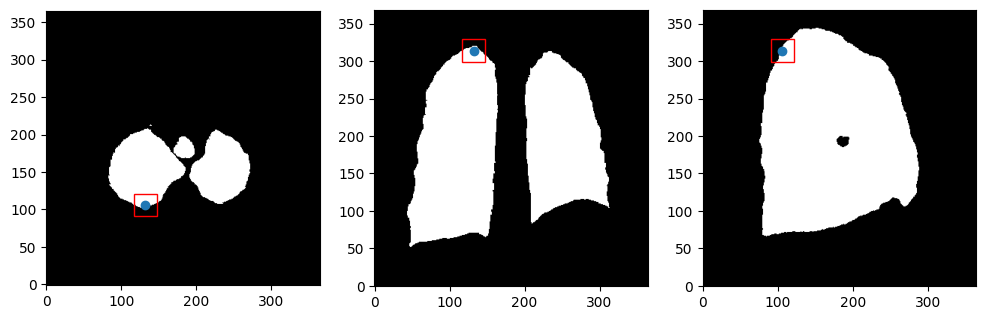

In [ ]:
warped_mask_arr = sitk.GetArrayFromImage(warped_mask)
warped_mask_arr[warped_mask_arr>0] = 1
plot_points_on_grid(x,y,z, warped_mask_arr)

**Task 1.5:** Another way to transform the mask is directly using the ``antsApplyTransforms`` executive. Complete the code below to apply the fitted affine transform to transform the moving mask to the fixed domain. Same as above:
- You will need to use nearest neighbor interpolater, because the segmentation mask is categorical.
- The default value needs to be set to 0.

**Hint:** Use ``!antsApplyTransforms`` to learn about the parameters

In [ ]:
import subprocess

moving_mask_path = '/Users/mounikag/Downloads/hw4/hw4_moving_mask_10009Y.nii.gz'
warped_mask_path = 'hw4_warped_mask_10009Y.nii.gz'
transform_path = warped_img_name+'_0GenericAffine.mat'

# complete the code below
cmd = f"""{ants_path}antsApplyTransforms \
    -d 3 \
    -i {moving_mask_path} \
    -r {fixed_img_path} \
    -o {warped_mask_path} \
    -t {transform_path} \
    -n NearestNeighbor \
    -f 0"""


os.system(cmd)

0

**Task 1.6:** Please use ITK-SNAP to overlay warped (transformed) segmentation on top of the warped moving image, and attach a screenshot below.

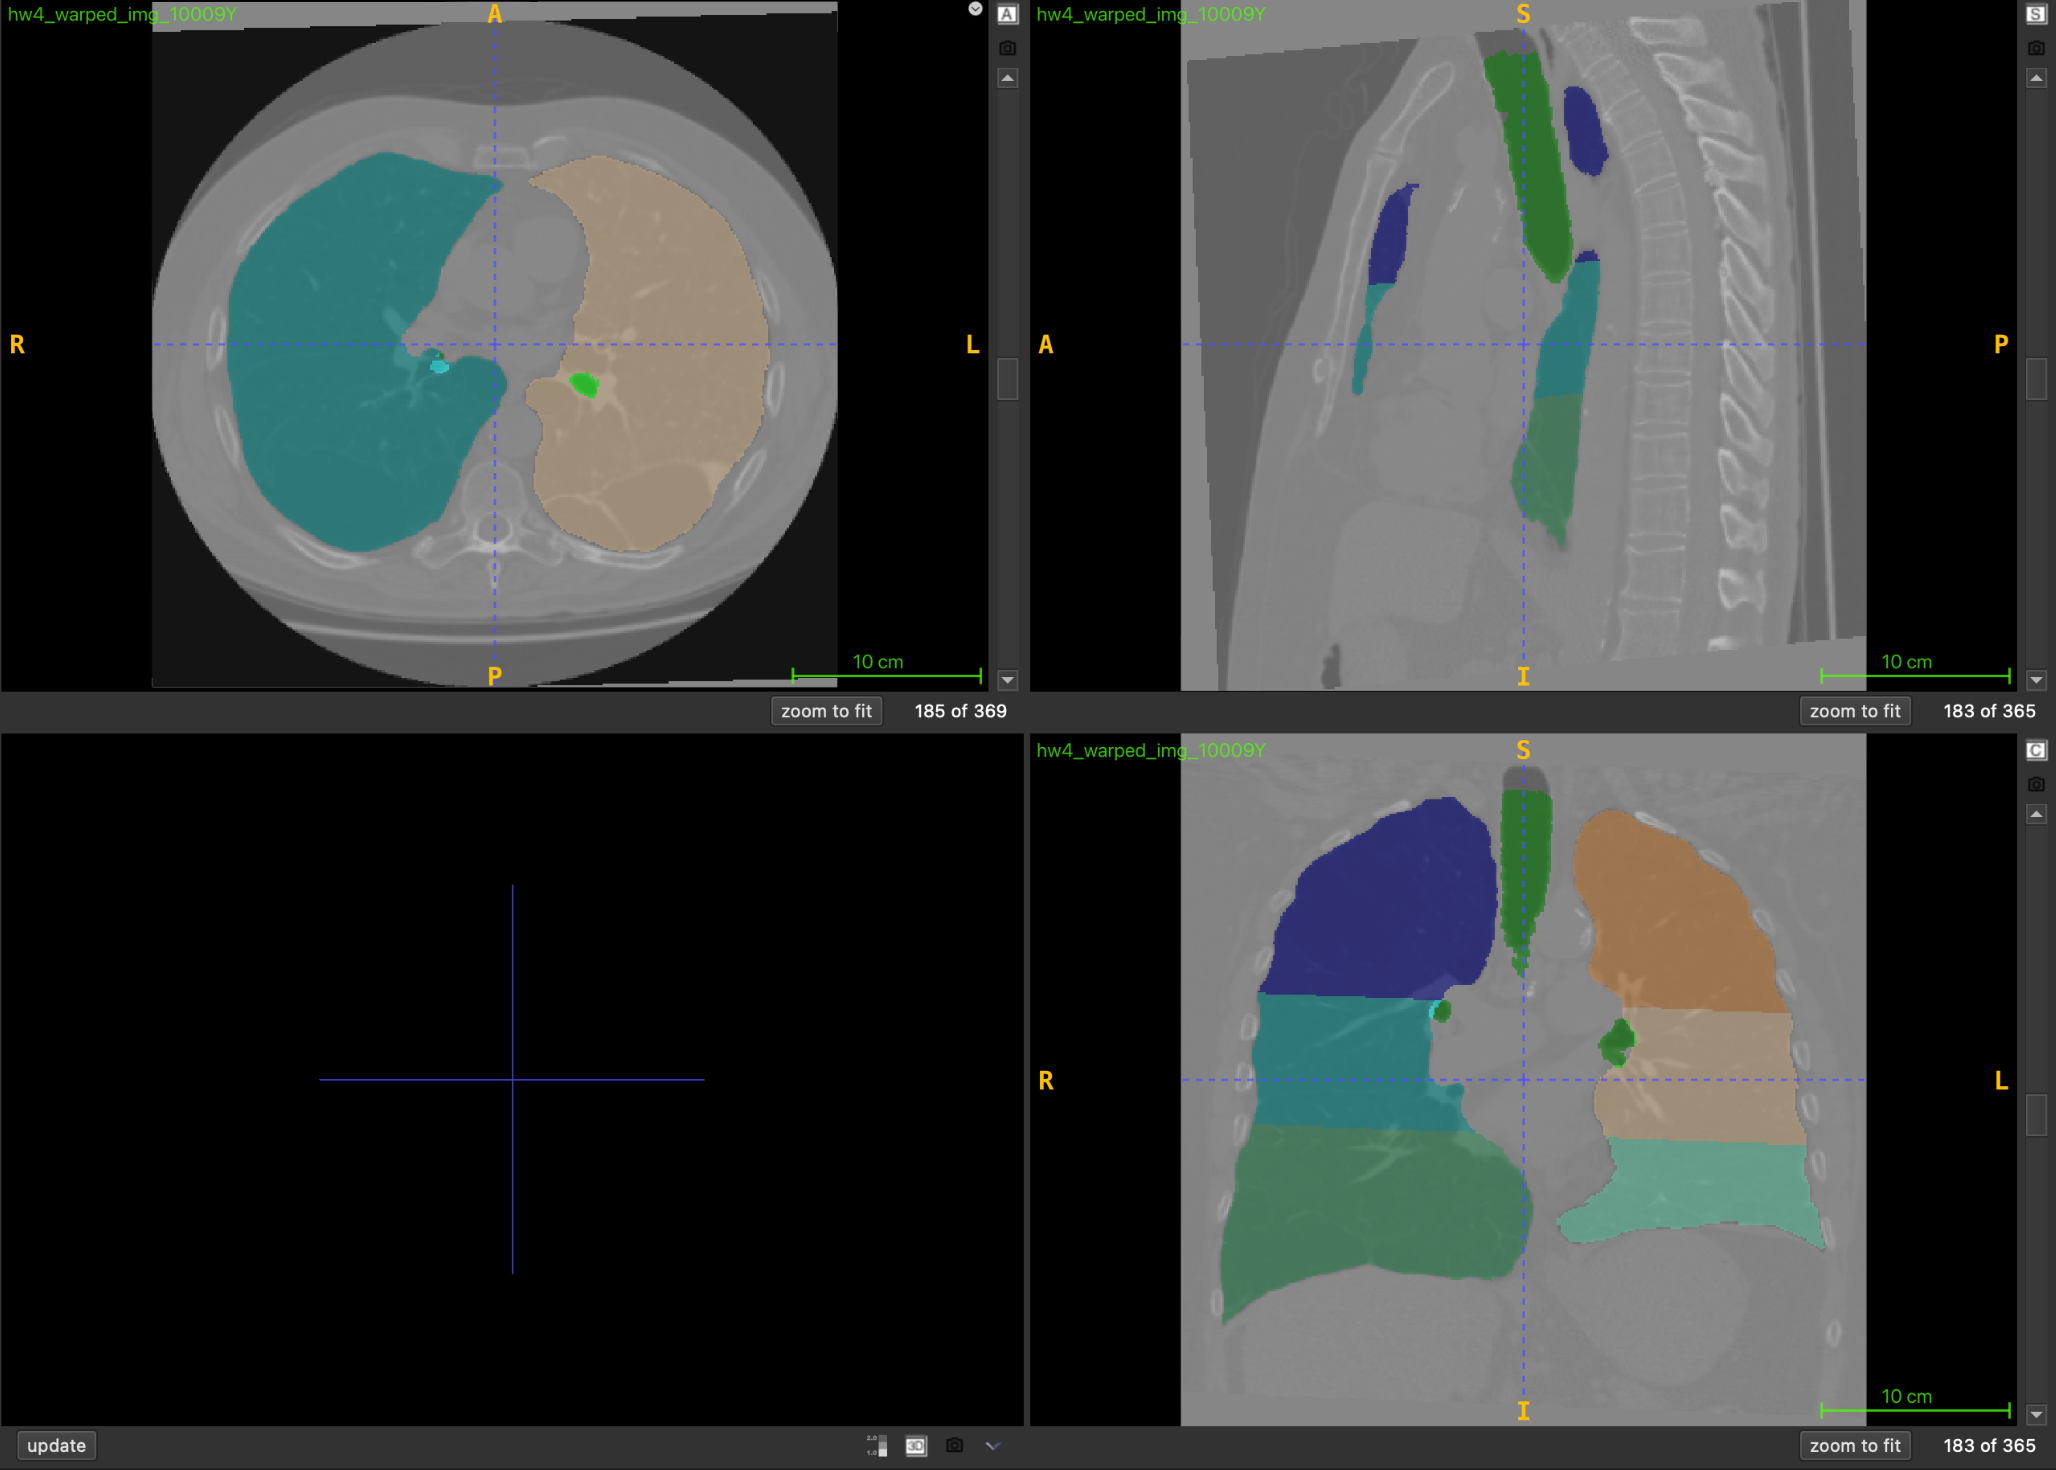

In [ ]:
import subprocess

moving_mask_path = '/Users/mounikag/Downloads/hw4/hw4_moving_mask_10009Y.nii.gz'
warped_mask_path = 'hw4_warped_mask_10009Y.nii.gz'
transform_path = warped_img_name+'_0GenericAffine.mat'

# complete the code below
cmd = f"""{ants_path}antsApplyTransforms \
    -d 3 \
    -i {moving_mask_path} \
    -r {fixed_img_path} \
    -o {warped_mask_path} \
    -t {transform_path} \
    -n NearestNeighbor \
    -f 0"""


os.system(cmd)

0

## Multi-stage Image registration with Composite Transform

In real applications, we often adopt a two-stage registration scheme for image registratrion to improve the accuracy and efficiency of the process. This approach involves a coarse affine registration stage followed by a fine deformable registration stage.

First, the coarse registration stage helps to bring the images into approximate alignment, reducing the search space for the subsequent fine registration stage. Next, the fine registration stage is performed to refine the alignment.

**Task 1.7:** Complete the code below for a two-stage registration. For the first stage, use the same affine setting as the task 1.1. For the second stage, use SyN transform with a gradient step of 0.01. For both stages, use Mutual Information (MI) as metric, with a radius of 1 voxel, 32 histogram bins, a regular sampling strategy, and a sampling percentage of 0.5 (i.e., 50% of the voxels will be used for the metric computation).

In [ ]:
warped_img_name = 'hw4_warped_img_composite_10009Y'
# ANTs path
ants_path = "/Users/mounikag/Downloads/ants-2.5.1-arm/bin/"
# complete the code below

cmd = ants_path + f"""antsRegistration -d 3 \
    -o [./{warped_img_name}_,./{warped_img_name}.nii.gz] \
    -r [{fixed_img_path},{moving_img_path},1] \
    -t Affine[0.01] \
    -m MI[{fixed_img_path},{moving_img_path},1,32,Regular,0.5] \
    -c [500x250x100] \
    -s 2x1x0 \
    -f 4x2x1 \
    -t SyN[0.01,3,0] \
    -m MI[{fixed_img_path},{moving_img_path},1,32,Regular,0.5] \
    -c [50] \
    -s 0 \
    -f 1"""

os.system(cmd)

0

With 8 CPU cores, it would be finished within 30 minutes.

**Task 1.8:** Use SimpleITK to overlay warped moving image on top of the fixed image, using a transparency of 50%. Attach a screenshot below. Write a discussion about the registration result comparing with the previous registration with only affine transform.

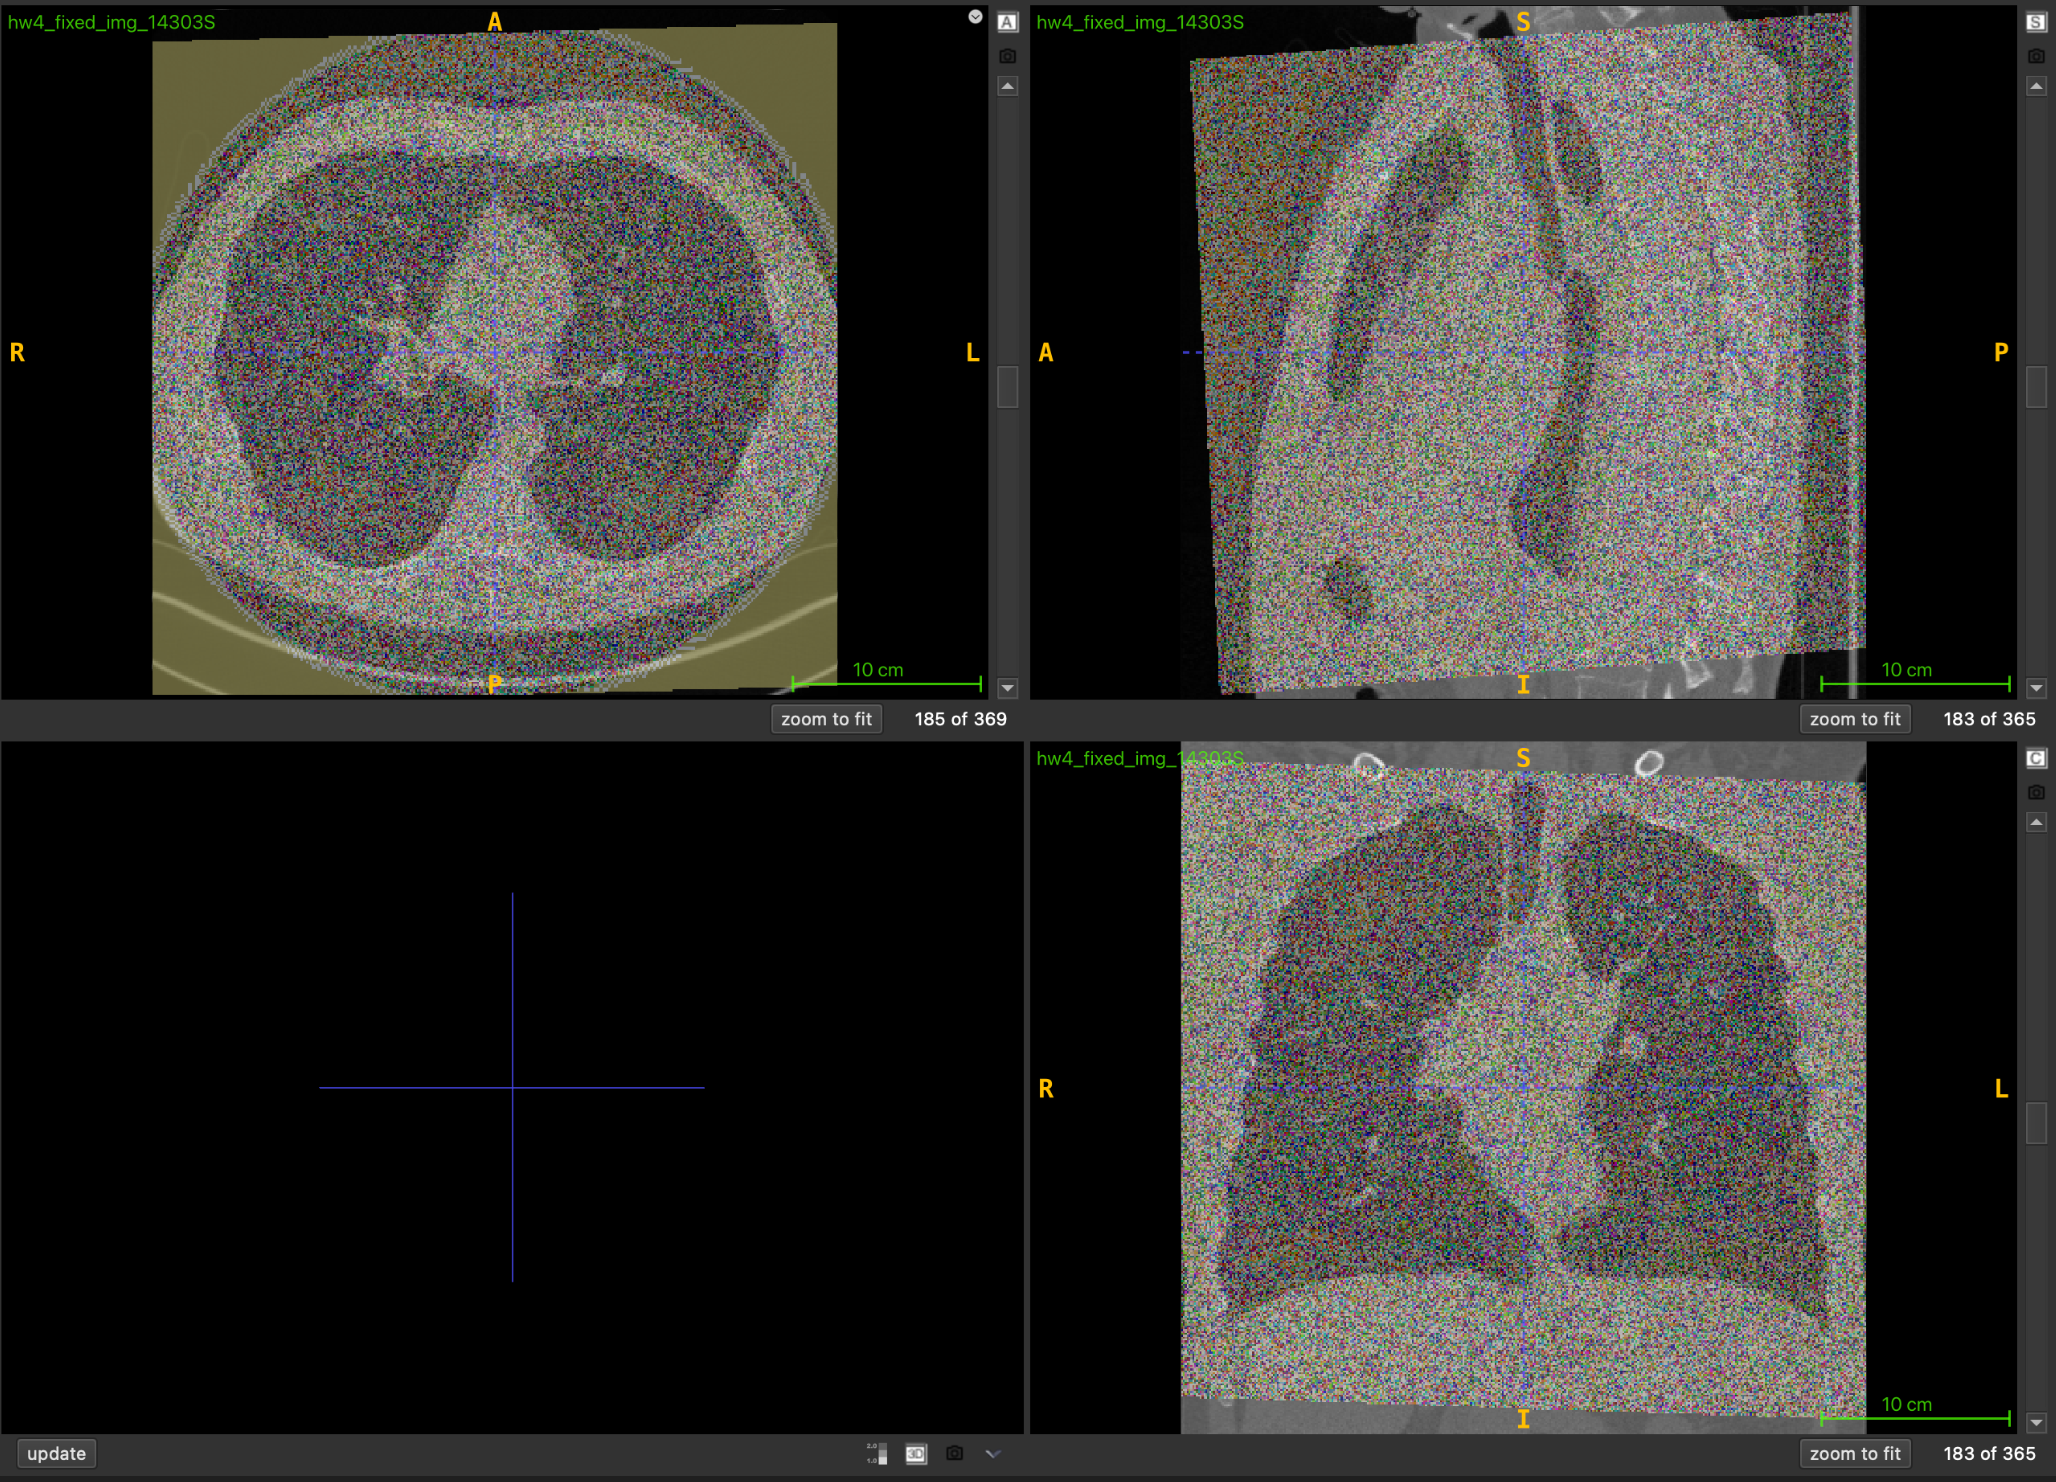

In the affine-only registration, the images were roughly aligned at a global scale (translation, rotation, scaling), but local misalignments (such as shape deformations, non-linear anatomical mismatches) were still visible, especially in complex regions like edges of organs or tissues.

In the affine + SyN composite registration, after the coarse affine stage, the fine SyN deformable stage refined the alignment by correcting local distortions. This resulted in significantly better alignment, especially in non-rigid areas.

### Apply the fitted composite transform to the segmentation mask
**Task 1.9:** Complete the code below to apply the fitted composite transform to the segmentation mask

*Hint:* Use *!antsApplyTransforms* to learn about the parameters

In [ ]:
moving_mask_path = '/Users/mounikag/Downloads/hw4/hw4_moving_mask_10009Y.nii.gz'
warped_mask_path = '/Users/mounikag/Desktop/hw4_warped_mask_10009Y.nii.gz'
# complete the command below
cmd = ants_path + "antsApplyTransforms" + f" -d 3 \
    -i {moving_mask_path} \
    -r {fixed_img_path} \
    -o {warped_mask_path} \
    -n NearestNeighbor \
    -t {warped_img_name}_1Warp.nii.gz \
    -t {warped_img_name}_0GenericAffine.mat \
    --default-value 0"
os.system(cmd)

0